In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use("CMS")
from IPython.display import set_matplotlib_formats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
set_matplotlib_formats('png', 'pdf', 'svg')
set_matplotlib_formats('retina')
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 24})
pd.set_option('display.max_rows', 140) 
pd.set_option('display.max_columns', 10) 


/tmp/ipykernel_1793869/981103907.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf', 'svg')
/tmp/ipykernel_1793869/981103907.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [28]:
df = pd.read_parquet('/vols/cms/hw423/Data/mass.parquet')
Lb = pd.read_pickle('/vols/cms/hw423/Data/Week14/label_InfA_DPrmvd.pkl')
Ly = pd.read_parquet('/vols/cms/hw423/Data/Week14/dfy_InfA_DPrmvd_Bld_x40x60.parquet')
Wt = pd.read_pickle('/vols/cms/hw423/Data/Week14/weight_InfA_DPrmvd.pkl')
# DF = pd.read_parquet('/vols/cms/hw423/Data/sampled.parquet')


In [23]:
Ly

,0,1,2,3,4,5,6
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4047133,False,False,False,False,False,True,False
4047134,False,False,False,False,False,True,False
4047135,False,False,False,False,False,True,False
4047136,False,False,False,False,False,True,False


In [7]:
# njets = df['HTXS_njets30']
proc = df['proc']
dms = df['diphotonMass']
dfw = df['weight']*138000
bins=np.linspace(80,180,30)
pp = dms[proc==0]
ggH = dms[proc==1]
qqH = dms[proc==2]
WH = dms[proc==3]
ZH = dms[proc==4]
ttH = dms[proc==5]
tH = dms[proc==6]
ppw = dfw[proc==0]
ggHw = dfw[proc==1]
qqHw = dfw[proc==2]
WHw = dfw[proc==3]
ZHw = dfw[proc==4]
ttHw = dfw[proc==5]
tHw = dfw[proc==6]
datas = [pp,ggH,qqH,WH,ZH,ttH,tH]
weights = [ppw,ggHw,qqHw,WHw,ZHw,ttHw,tHw]
col = ['$\gamma\gamma$','ggH','qqH','WH','ZH','ttH','tH']
colors = ['whitesmoke','c','darkorange','seagreen','limegreen','orchid','gold']
edgecolors = ['black','c','darkorange','seagreen','limegreen','orchid','gold']
Label = np.array(pd.get_dummies(proc))
Weight = np.array(dfw)


In [4]:
hist_w = []
bin_l = np.logspace(-5, 2, 40)
for i in range(7):
    value,bins = np.histogram(weights[i], bins=bin_l,density=True,range=(0,1e2))
    hist_w.append(value)

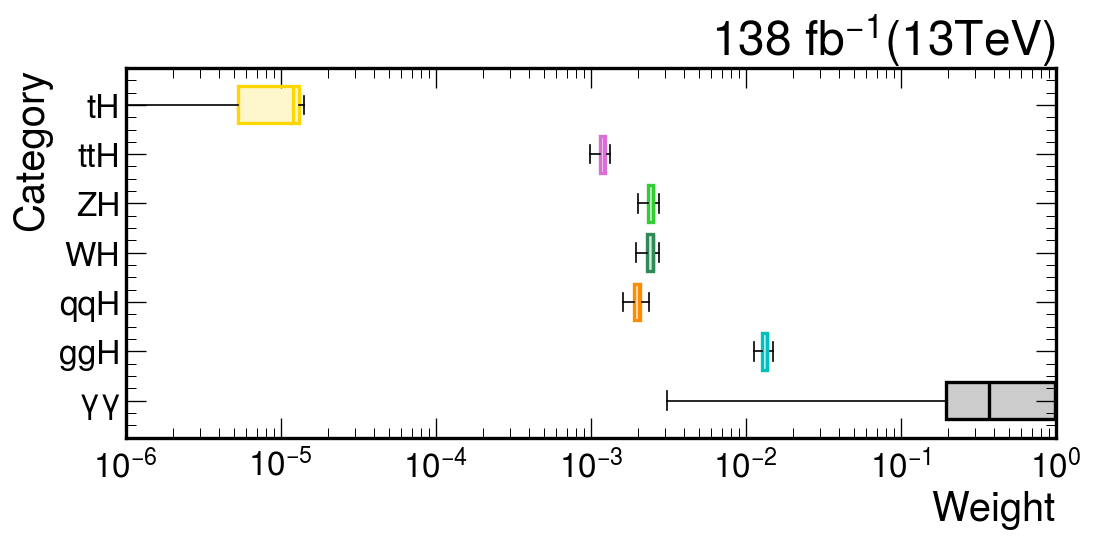

In [18]:
filtered_weights = [w[w >= 0] for w in weights]
fig,ax = plt.subplots(figsize=(10,4))
pst=np.linspace(0,4,7)
box = ax.boxplot(filtered_weights,patch_artist=True,labels=col,vert=False,showfliers=False,widths=0.5,positions=pst)
ax.set_xscale('log')
ax.set_xlabel('Weight')
rgba_colors = [mcolors.to_rgba(color, alpha=0.2) for color in edgecolors]
ax.set_xlim(1e-6,1)
ax.set_ylabel('Category')
for patch, color, edge_color in zip(box['boxes'], rgba_colors, edgecolors):
    patch.set_facecolor(color)
    patch.set_edgecolor(edge_color)
    patch.set_linewidth(2) 
for median, color in zip(box['medians'], edgecolors):
    median.set_color(color)
    median.set_linewidth(2)
# patches = [mpatches.Patch(color=rgba_colors[i], label=f'{c}') for i, c in enumerate(col)]
# ax.legend(handles=patches, loc='upper right',ncol=2) 
plt.title('138 $fb^{-1}$(13TeV)',loc='right')
# plt.title('Weight',loc='left',fontstyle='italic')
fig.savefig('/vols/cms/hw423/WeekF/plots/weight.pdf',bbox_inches='tight')
plt.show()

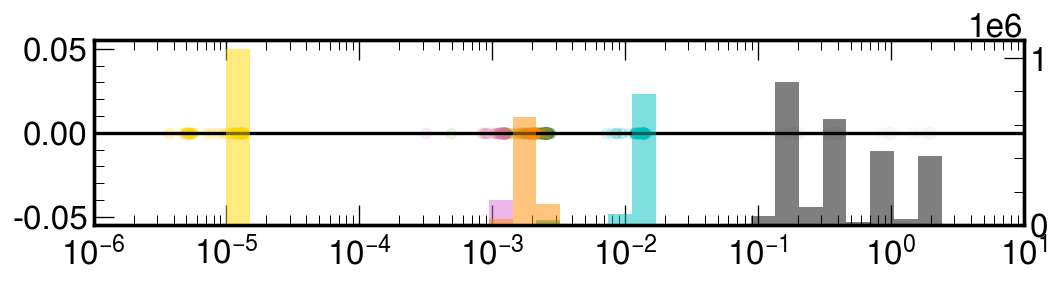

In [31]:
fig, ax = plt.subplots(figsize=(10, 2))
for i in range(7):
    ax.scatter(weights[-1::-1][i].sample(n=100),np.zeros(100),label=col[-1::-1][i],color=colors[-1::-1][i],alpha=0.1)
ax.hlines(0,1e-6,1e2,colors = 'black',lw=2)
ax.set_xlim(1e-6,1e1)
ax2 = ax.twinx()

for i in range(7):
    ax2.hist(weights[-1::-1][i],bins=bin_l,label=col[-1::-1][i],color=edgecolors[-1::-1][i],alpha=0.5)
# legend = plt.legend(ncol=4,edgecolor='black')
# legend.get_patches()[-1].set_edgecolor('black')
    
# hep.histplot(
#     hist_w[-1::-1],
#     stack=False,
#     bins=bin_l,
#     edgecolor=edgecolors[-1::-1],
#     alpha=[1,1,1,1,1,1,1],
#     histtype='step',
#     color=colors[-1::-1],
#     ax=ax,
# )
# # ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_yscale('log')

# plt.ylim(1e-1,1e5)
# plt.xlabel('$m_{\gamma\gamma}$(GeV)')
# plt.ylabel('Events')
# # hep.cms.label(data=False,rlabel='$m_H$=125GeV')
# fig.savefig('/vols/cms/hw423/WeekF/plots/hist.pdf',bbox_inches='tight')

plt.show()

In [20]:
hists = []
for i in range(7):
    value,bins = np.histogram(datas[i], bins=30,range=(80,180),weights=weights[i])
    hists.append(value)


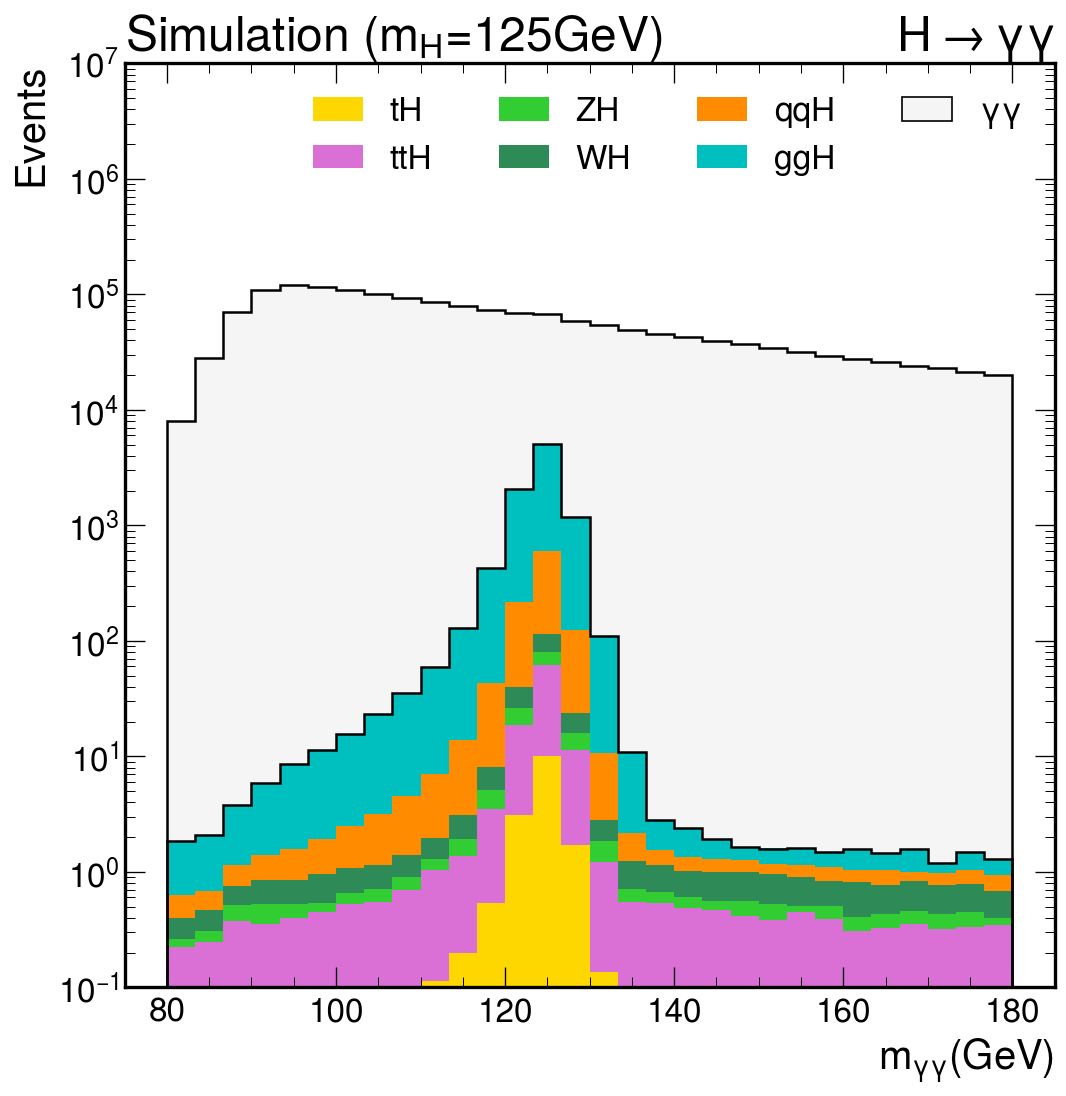

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(datas[-1::-1],weights=weights[-1::-1], bins=bins, stacked=True, label=col[-1::-1], color=colors[-1::-1])
legend = plt.legend(ncol=4,edgecolor='black')
legend.get_patches()[-1].set_edgecolor('black')
    
hep.histplot(
    hists[-1::-1],
    stack=True,
    bins=bins,
    edgecolor=["black"]*7,
    alpha=[0,0,0,0,0,1,1],
    histtype='step',
    color=colors[-1::-1],
    ax=ax,
)
ax.set_yscale('log')

plt.ylim(1e-1, 1e7)
plt.xlabel('$m_{\gamma\gamma}$(GeV)')
plt.ylabel('Events')
# hep.cms.label(data=False,rlabel='$m_H$=125GeV')
plt.title(r'$H\to\gamma\gamma$',loc='right')
plt.title(r'Simulation ($m_H$=125GeV)',loc='left')
fig.savefig('/vols/cms/hw423/WeekF/plots/hist.pdf',bbox_inches='tight')

plt.show()

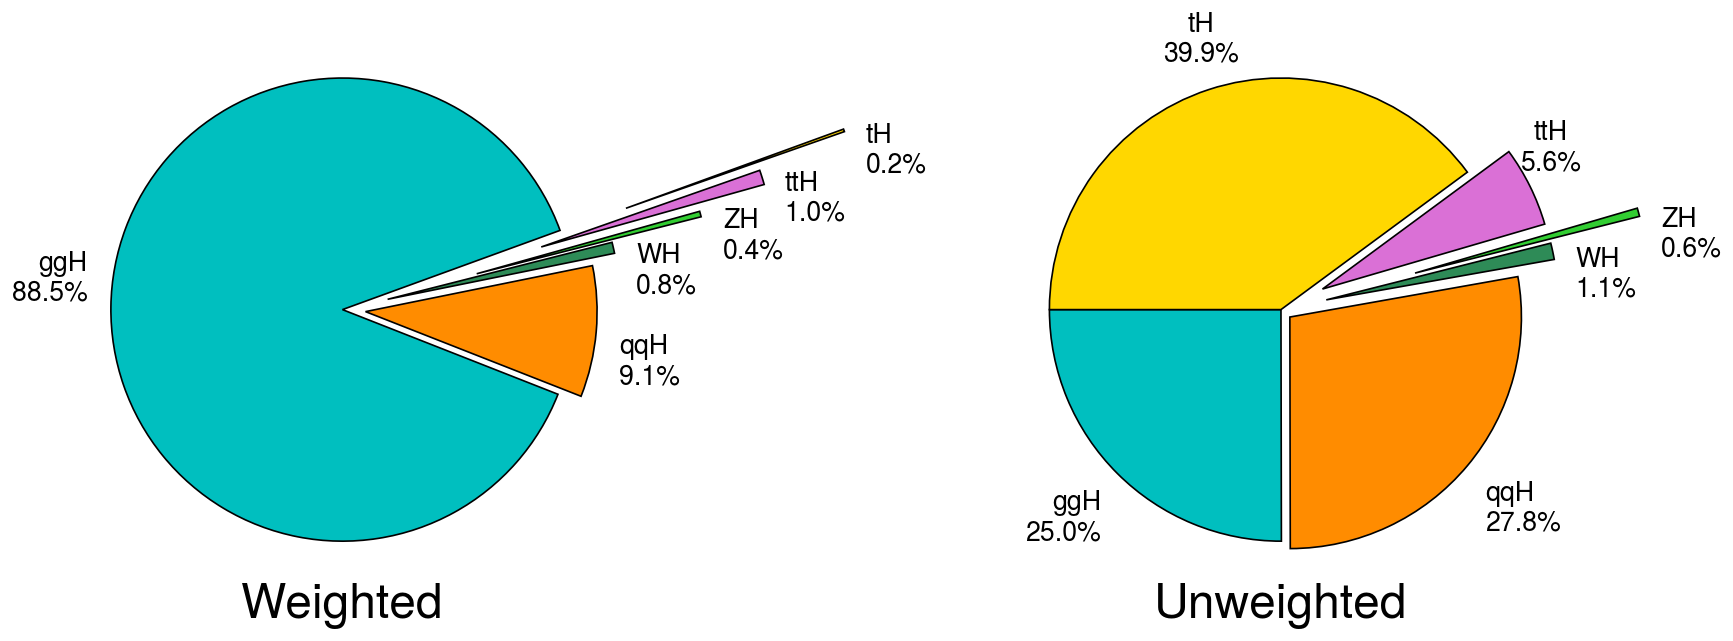

In [25]:
explode = (0, 0.1, 0.2, 0.6, 0.9, 1.3)
ratio = Label.T@dfw
def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]

fig, ax = plt.subplots(1,2,figsize=(15,8))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[0].pie(ratio[1:], labels=create_labels(col[1:], ratio[1:]), 
                      explode=explode, colors=colors[1:],startangle=20,wedgeprops=wedgeprops,labeldistance=1.1)

for i, text in enumerate(texts):
    if i ==(0):
        text.set_va('bottom')
        text.set_ha('right')# 设置标签的水平对齐方式
    else:
        text.set_va('top')
        
        text.set_ha('left')# 设置标签的水平对齐方式
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    
    text.set_fontsize(16)  # 调整字体大小
    
    
ax[0].set_title('Weighted',loc='center',y=-0.050)
explode = (0., 0.05, 0.2, 0.6, 0.2, 0)

def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]
ratio = np.array(Label.sum(axis=0))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[1].pie(ratio[1:], labels=create_labels(col[1:], ratio[1:]), 
                      explode=explode, colors=colors[1:],startangle=180,wedgeprops=wedgeprops,labeldistance=1.1)

for i,text in enumerate(texts):
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    text.set_fontsize(16)
    if (i<4 and i>0):
        text.set_ha('left')  # 设置标签的水平对齐方式
        text.set_va('top')
    elif i==0:
        text.set_ha('right')
        text.set_va('top')
    else:
        text.set_ha('center')  # 设置标签的水平对齐方式
        text.set_va('bottom')
ax[1].set_title('Unweighted',loc='center',y=-0.05)
    

# plt.setp(texts,size=10, color="black")
# plt.setp(texts, size=10)

# fig.axis('equal')

# hep.cms.label(ax=ax[0],rlabel="")
fig.tight_layout()
fig.savefig('/vols/cms/hw423/WeekF/plots/pie.pdf',bbox_inches='tight')

plt.show()

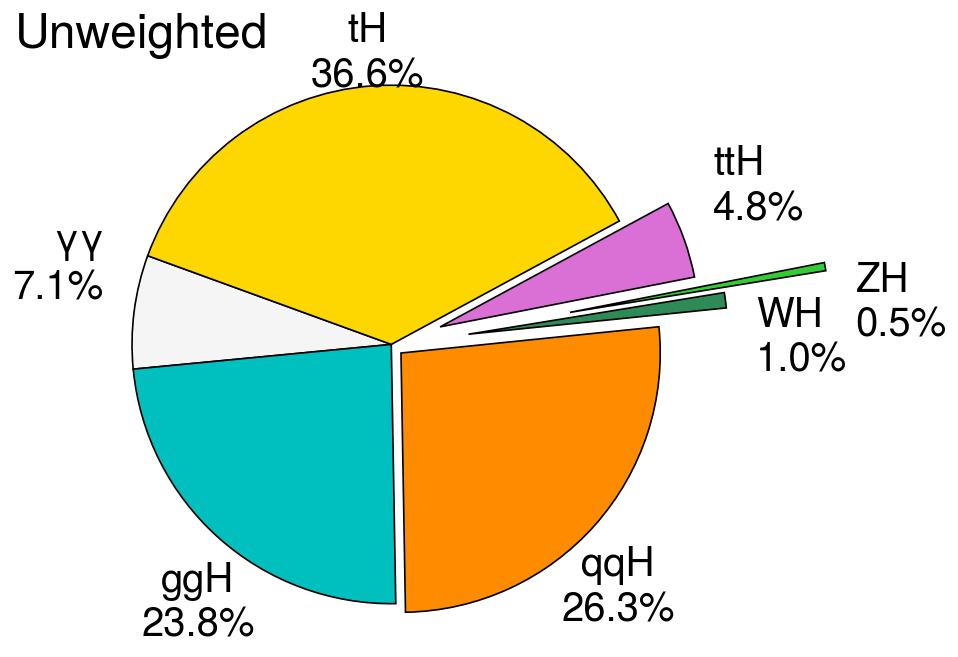

In [47]:
explode = (0.,0., 0.05, 0.3, 0.7, 0.2, 0)
Label = pd.get_dummies(Lb)
def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]
ratio = np.array(Label.sum(axis=0))
fig, ax = plt.subplots(figsize=(9,6))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax.pie(ratio, labels=create_labels(col, ratio),
                      explode=explode, colors=colors,startangle=160,wedgeprops=wedgeprops,labeldistance=1.12)

for i,text in enumerate(texts):
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    text.set_fontsize(24) 
    if (i<3 and i>0):
        text.set_ha('center')  # 设置标签的水平对齐方式
        text.set_va('top')
    elif i ==0 :
        text.set_ha('right')  # 设置标签的水平对齐方式
        text.set_va('bottom')
    elif i<5 :
        text.set_ha('left')  # 设置标签的水平对齐方式
        text.set_va('top')
    elif i<6 :
        text.set_ha('left')  # 设置标签的水平对齐方式
        text.set_va('bottom')
    else:
        x, y = text.get_position()
        x *= 1.1 
        y *= 1.15
        text.set_position((x, y))
        text.set_ha('center')  # 设置标签的水平对齐方式
        text.set_va('top')
    

# plt.setp(texts,size=10, color="black")
# plt.setp(texts, size=10)

plt.axis('equal')
# hep.cms.label(rlabel="Unweighted")
plt.title('Unweighted',loc='left')
plt.tight_layout()
plt.savefig('/vols/cms/hw423/WeekF/plots/pie_rmd_uw.pdf',bbox_inches='tight')
plt.show()

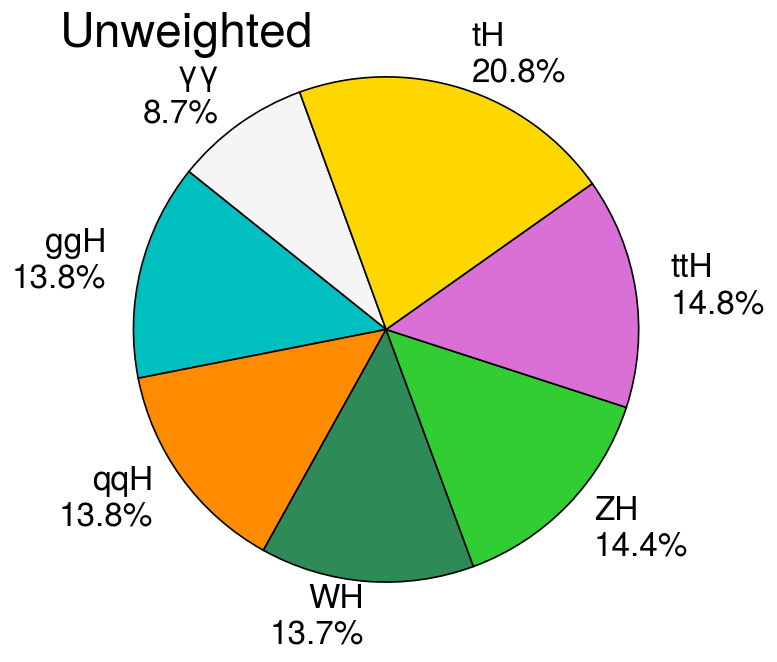

In [53]:
explode = (0.,0., 0.0, 0., 0., 0., 0)
Label = Ly
def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]
ratio = np.array(Label.sum(axis=0))
fig, ax = plt.subplots(figsize=(7,6))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax.pie(ratio, labels=create_labels(col, ratio),
                      explode=explode, colors=colors,startangle=110,wedgeprops=wedgeprops,labeldistance=1.14)

# for i,text in enumerate(texts):
#     text.set_rotation(0)  # 可以根据需要调整旋转角度
#     text.set_fontsize(24) 
#     if (i<3 and i>0):
#         text.set_ha('center')  # 设置标签的水平对齐方式
#         text.set_va('top')
#     elif i ==0 :
#         text.set_ha('right')  # 设置标签的水平对齐方式
#         text.set_va('bottom')
#     elif i<5 :
#         text.set_ha('left')  # 设置标签的水平对齐方式
#         text.set_va('top')
#     elif i<6 :
#         text.set_ha('left')  # 设置标签的水平对齐方式
#         text.set_va('bottom')
#     else:
#         x, y = text.get_position()
#         x *= 1.1 
#         y *= 1.1
#         text.set_position((x, y))
#         text.set_ha('left')  # 设置标签的水平对齐方式
#         text.set_va('top')
    

# plt.setp(texts,size=10, color="black")
# plt.setp(texts, size=10)

plt.axis('equal')
# hep.cms.label(rlabel="Unweighted")
plt.title('Unweighted',loc='left')
plt.tight_layout()
plt.savefig('/vols/cms/hw423/WeekF/plots/pie_rmd_bld.pdf',bbox_inches='tight')
plt.show()

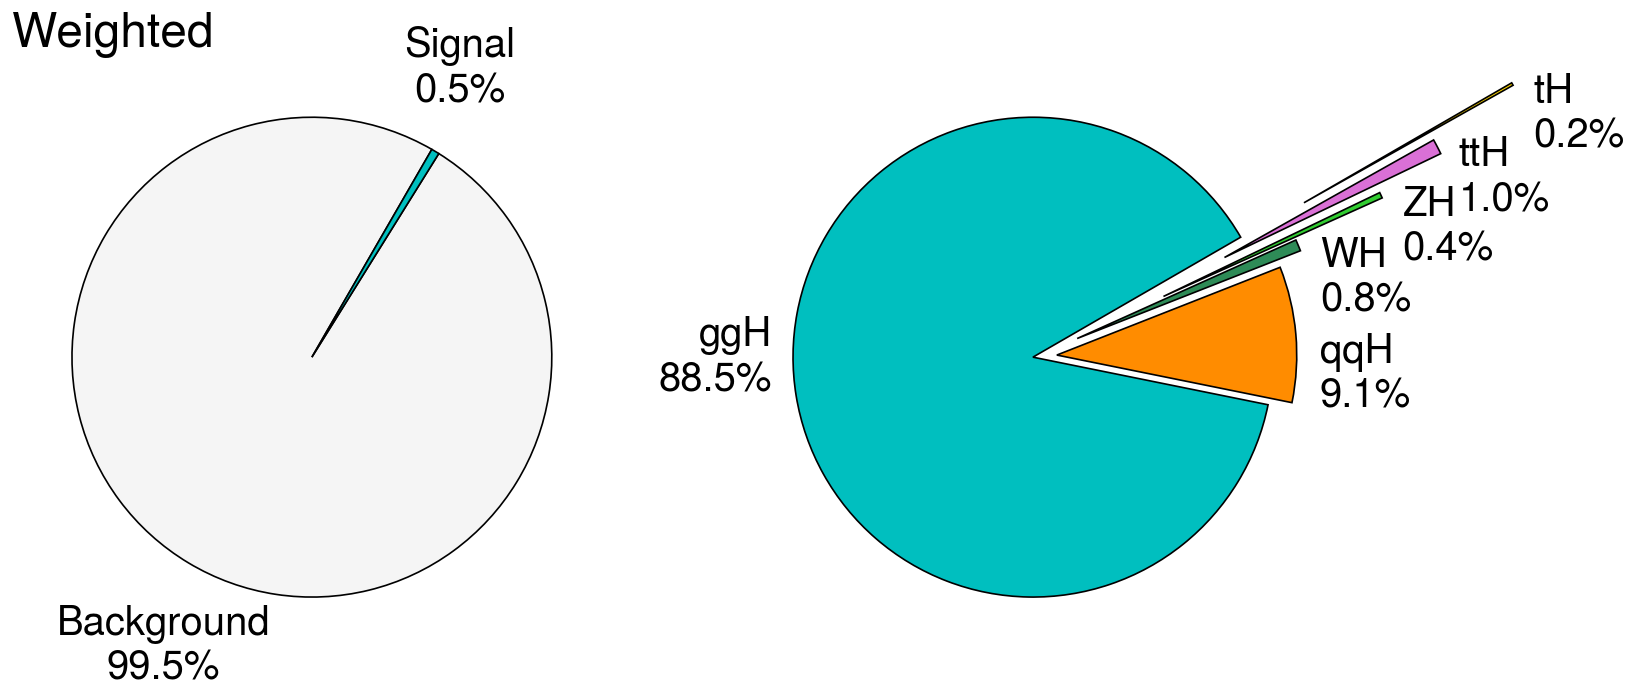

In [37]:


def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]
explode = (0, 0.1, 0.2, 0.6, 0.9, 1.3)
ratio = Label.T@dfw
fig, ax = plt.subplots(1,2,figsize=(14,8))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[1].pie(ratio[1:], labels=create_labels(col[1:], ratio[1:]), 
                      explode=explode, colors=colors[1:],normalize=True,startangle=30,wedgeprops=wedgeprops,labeldistance=1.1)

for i, text in enumerate(texts):
    if i ==(0):
        text.set_va('bottom')
        text.set_ha('right')# 设置标签的水平对齐方式
    else:
        text.set_va('top')
        
        text.set_ha('left')# 设置标签的水平对齐方式
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    
    text.set_fontsize(24)  # 调整字体大小

ratio = Label.T@dfw
R = np.array([ratio[0],ratio.sum()-ratio[0]])
def create_labels(labels, sizes):
    return [f"{label}\n{size:.1f}%" for label, size in zip(labels, sizes/sizes.sum()*100)]

wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[0].pie(R, labels=create_labels(['Background','Signal'], R), 
                      startangle=60,colors= ['whitesmoke','c'],normalize=True,wedgeprops=wedgeprops,labeldistance=1.2)
for i, text in enumerate(texts):
    if i == 0:
        text.set_va('top')
    else:
        text.set_va('bottom')
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    text.set_fontsize(24)  # 调整字体大小
    text.set_ha('center')

# plt.setp(texts,size=10, color="black")
# plt.setp(texts, size=10)

plt.subplots_adjust(wspace=0.4)
# ax[0].axis('equal')
# ax[1].axis('equal')
# hep.cms.label(ax=ax[0],rlabel='')
ax[0].set_title('Weighted',loc='left')
fig.tight_layout()
fig.savefig('/vols/cms/hw423/WeekF/plots/pie_wtd.pdf',bbox_inches='tight')

fig.show()

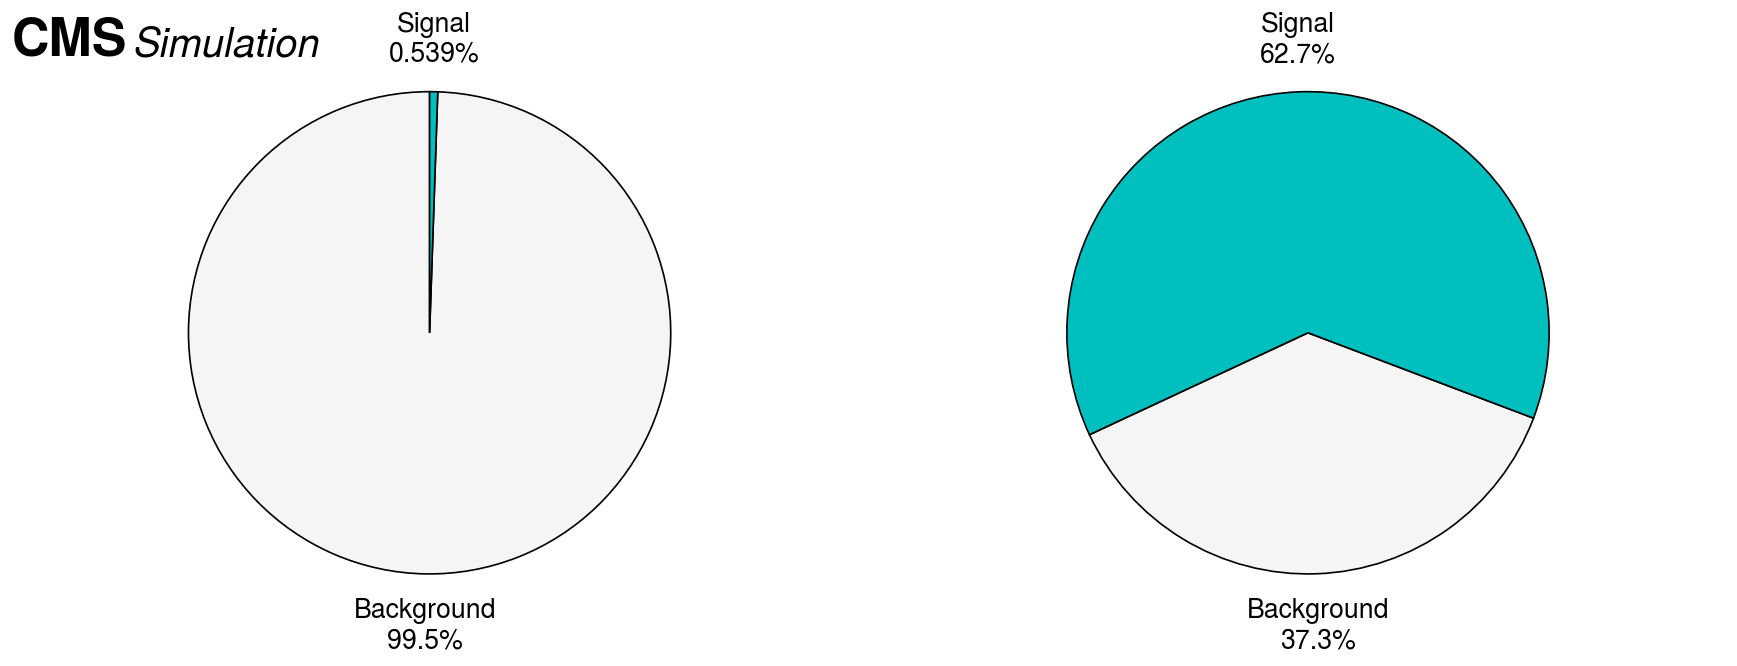

In [187]:
# explode = (0, 0.1, 0.2, 0.6, 0.9, 1.3)
ratio = Label.T@dfw
R = np.array([ratio[0],ratio.sum()-ratio[0]])
def create_labels(labels, sizes):
    return [f"{label}\n{size:.3}%" for label, size in zip(labels, sizes/sizes.sum()*100)]

fig, ax = plt.subplots(1,2,figsize=(15,6))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[0].pie(R, labels=create_labels(['Background','Signal'], R), 
                      startangle=90,colors= ['whitesmoke','c'],wedgeprops=wedgeprops)
for i, text in enumerate(texts):
    if i == 0:
        text.set_va('top')
    else:
        text.set_va('bottom')
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    text.set_fontsize(16)  # 调整字体大小
    text.set_ha('center')
    
ratio = Label.sum(axis=0)
R = np.array([ratio[0],ratio.sum()-ratio[0]])
def create_labels(labels, sizes):
    return [f"{label}\n{size:.3}%" for label, size in zip(labels, sizes/sizes.sum()*100)]

wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax[1].pie(R, labels=create_labels(['Background','Signal'], R), 
                      startangle=205,colors= ['whitesmoke','c'],wedgeprops=wedgeprops)
for i, text in enumerate(texts):
    if i == 0:
        text.set_va('top')
    else:
        text.set_va('bottom')
    text.set_rotation(0)  # 可以根据需要调整旋转角度
    text.set_fontsize(16)  # 调整字体大小
    text.set_ha('center')


ax[0].axis('equal')
ax[1].axis('equal')
hep.cms.label(ax=ax[0],rlabel="",loc=0)
# fig.subplots_adjust(wspace=1)
fig.tight_layout()
fig.savefig('/vols/cms/hw423/WeekF/plots/pie_sb.pdf',bbox_inches='tight')
fig.show()

In [235]:
create_labels(['Background,Signal'], R)


['Background,Signal\n99.5%']

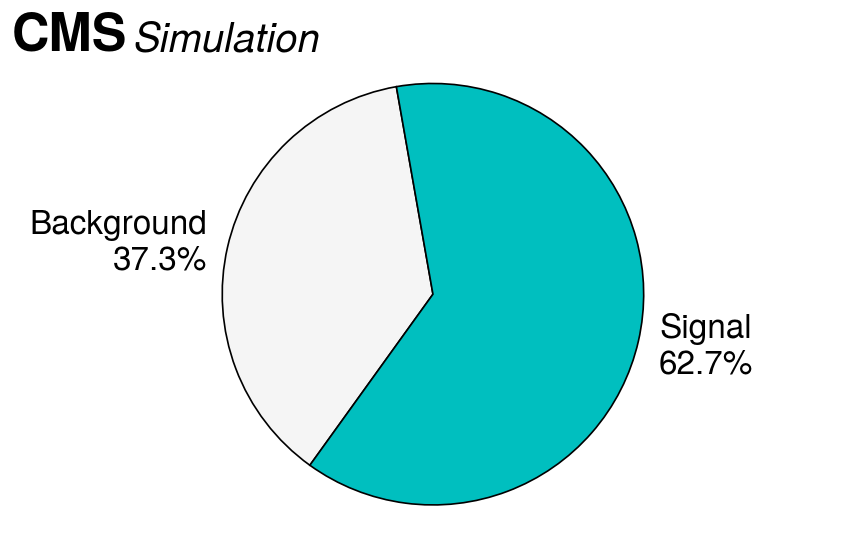

In [121]:
# explode = (0, 0.1, 0.2, 0.6, 0.9, 1.3)
ratio = Label.sum(axis=0)
R = np.array([ratio[0],ratio.sum()-ratio[0]])
def create_labels(labels, sizes):
    return [f"{label}\n{size:.3}%" for label, size in zip(labels, sizes/sizes.sum()*100)]

fig, ax = plt.subplots(figsize=(8,5))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts= ax.pie(R, labels=create_labels(['Background','Signal'], R), 
                      startangle=100,colors= ['whitesmoke','c'],wedgeprops=wedgeprops)

# for text in texts:
#     text.set_rotation(0)  # 可以根据需要调整旋转角度
#     text.set_fontsize(16)  # 调整字体大小
#     text.set_ha('center')  # 设置标签的水平对齐方式
#     text.set_va('top')

# plt.setp(texts,size=10, color="black")
# plt.setp(texts, size=10)

plt.axis('equal')
hep.cms.label(rlabel="")
plt.tight_layout()
plt.savefig('/vols/cms/hw423/WeekF/plots/pie_sb_uw.pdf')

plt.show()

Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)
Rectangle(xy=(-0, -0), width=29.988, height=13.9944, angle=0)


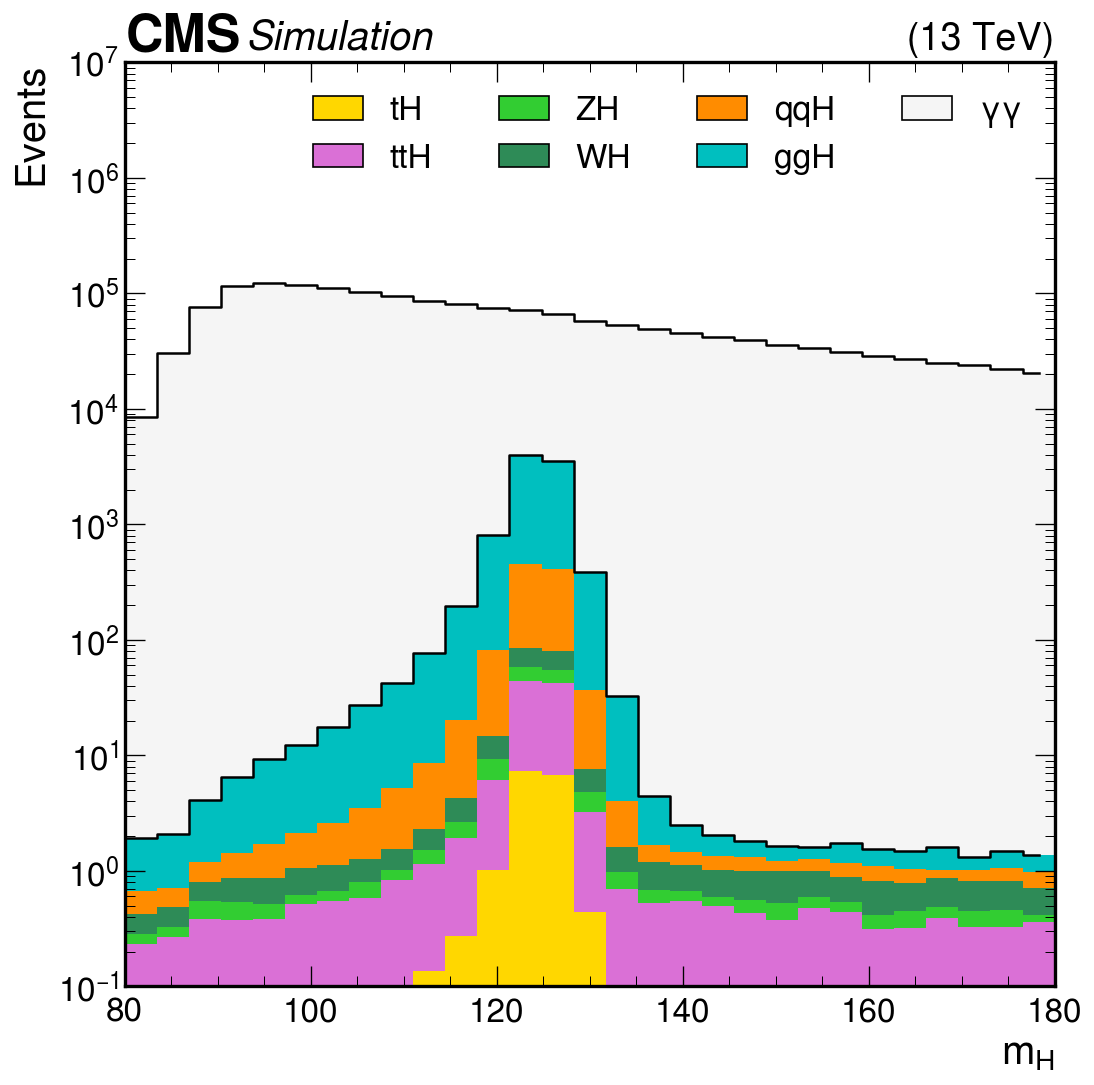

In [303]:
hist_data = plt.hist(datas[-1::-1],weights=weights[-1::-1], bins=bins, stacked=True, label=col[-1::-1], color=colors[-1::-1],log=True,)

plt.step(hist_data[1]-1/2*(bins[1]-bins[0]), np.insert(hist_data[0][-1], 0, 0), where='mid', color='black', linewidth=1.5)
plt.step(hist_data[1]-1/2*(bins[1]-bins[0]), np.insert(hist_data[0][-2], 0, 0), where='mid', color='black', linewidth=1.5)
plt.ylim(1e-1, 1e7)
# pp.hist(bins=bins,histtype='step',weights=ppw)
plt.xlim(80,180)
legends = plt.legend(facecolor='white',ncol=4,edgecolor='black')
for patch in legends.get_patches():
    patch.set_edgecolor('black')
    print(patch)
plt.xlabel('$m_H$')
plt.ylabel('Events')
plt.savefig('/vols/cms/hw423/WeekF/plots/hist.pdf')
hep.cms.label(data=False)
plt.show()